In [1]:
from AFEP_parse import *

from IPython.display import display, Markdown

import warnings #Suppress future warnings from pandas.
warnings.simplefilter(action='ignore', category=FutureWarning)

## This notebook makes use of pyMBAR and Alchemlyb
See Shirts and Chodera (2008) for more details

"Statistically optimal analysis of samples from multiple equilibrium states" doi: 10.1063/1.2978177

# User parameters
## IMPORTANT: Make sure the temperature matches the temperature used to run the simulations.

In [10]:
temperature = 300
decorrelate = True #Flag for automatic decorrelation
detectEQ = False #Flag for automatic equilibrium detection

# Process the Bound Data

In [3]:
path='../AFEP-Bound-Decoupling/output/'
filename='*.fepout' #This can be a regex pattern if you have more than one fepout file

RT = 0.00198720650096 * temperature # RT in kcal/mol
fepoutFiles = glob(path+filename)
fepoutFiles = natsorted(fepoutFiles)
#print(f"Will process {len(fepoutFiles)} fepout files")

In [4]:
u_nk, _ = readAndProcess(fepoutFiles, temperature, decorrelate, detectEQ) #u_nk stores the fep data
perWindow, cumulative = doEstimation(u_nk)

Decorrelating samples. Flag='True'


In [5]:
forward, forward_error, backward, backward_error = doConvergence(u_nk) #Used later in the convergence plot

In [6]:
changeAndError = f'\u0394G = {np.round(cumulative.BAR.f.iloc[-1]*RT, 1)}\u00B1{np.round(cumulative.BAR.errors.iloc[-1], 3)} kcal/mol'
Markdown('<font size=7>{}</font><br/>'.format(changeAndError))

<font size=7>ΔG = 14.9±0.128 kcal/mol</font><br/>

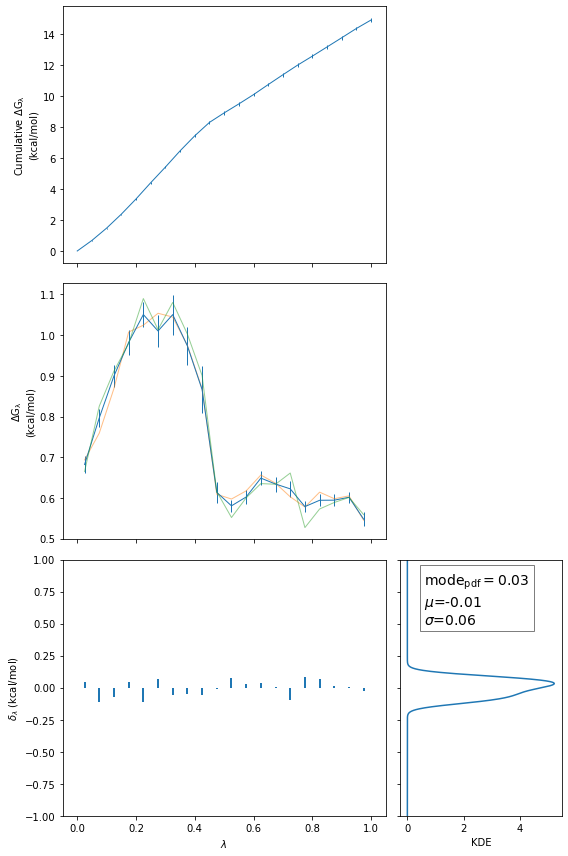

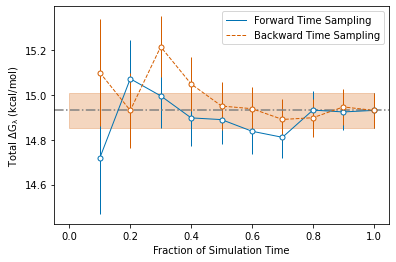

In [7]:
width = 8
height = 4
fig, axes = plotGeneral(cumulative, perWindow, RT, width=width, height=height, PDFtype='KDE')
plt.savefig(f'{path}_bound_generalFigures.pdf')
#plt.savefig(f'{path}dG_{affix}.png', dpi=600)
plt.show()

fig, convAx = plt.subplots(1,1)
convAx = convergencePlot(convAx, forward*RT, forward_error*RT, backward*RT, backward_error*RT)
convAx.set(xlabel='Fraction of Simulation Time', ylabel=r'Total $\rm\Delta G_{\lambda}$ (kcal/mol)')
fig.set_figwidth(width*3/4)
fig.set_figheight(height)
convAx.legend()
plt.savefig(f'{path}_bound_convergence.pdf')
plt.show()

# Process the Unbound Data

In [8]:
path='../AFEP-Hydration/output/'
filename='*.fepout' #This can be a regex pattern if you have more than one fepout file

RT = 0.00198720650096 * temperature # RT in kcal/mol
fepoutFiles = glob(path+filename)
fepoutFiles = natsorted(fepoutFiles)
#print(f"Will process {len(fepoutFiles)} fepout files")

In [9]:
u_nk, _ = readAndProcess(fepoutFiles, temperature, decorrelate, detectEQ) #u_nk stores the fep data
perWindow, cumulative = doEstimation(u_nk)

StopIteration: 

In [ ]:
forward, forward_error, backward, backward_error = doConvergence(u_nk) #Used later in the convergence plot

In [ ]:
changeAndError = f'\u0394G = {np.round(cumulative.BAR.f.iloc[-1]*RT, 1)}\u00B1{np.round(cumulative.BAR.errors.iloc[-1], 3)} kcal/mol'
Markdown('<font size=7>{}</font><br/>'.format(changeAndError))

In [ ]:
width = 8
height = 4
fig, axes = plotGeneral(cumulative, perWindow, pdfX, pdfY, width=width, height=height, PDFtype='KDE')
plt.savefig(f'{path}_bound_generalFigures.pdf')
#plt.savefig(f'{path}dG_{affix}.png', dpi=600)
plt.show()

fig, convAx = plt.subplots(1,1)
convAx = convergencePlot(convAx, forward*RT, forward_error*RT, backward*RT, backward_error*RT)
convAx.set(xlabel='Fraction of Simulation Time', ylabel=r'Total $\rm\Delta G_{\lambda}$ (kcal/mol)')
fig.set_figwidth(width*3/4)
fig.set_figheight(height)
convAx.legend()
plt.savefig(f'{path}_bound_convergence.pdf')
plt.show()